Copyright 2022 Dale Bowman, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Multiple linear regression  

In many data sets there may be several predictor variables that have an effect on a response variable.
 In fact, the *interaction* between variables may also be used to predict response.
 When we incorporate these additional predictor variables into the analysis, the model is called *multiple regression* .
 The multiple regression model builds on the simple linear regression model by adding additional predictors with corresponding parameters.
 
## What you will learn

In the sections that follow you will learn about multiple regression, an extension of simple linear regression, and how it can be used to model your data for prediction.  We will study the following:

- The multiple regression model
- Interaction effects
- Feature selection
- Categorical variables
- Diagnostics

## When to use multiple regression

Multiple regression models are useful when you have a continuous response variable and you believe there are multiple predictors that have a linear relationship with the response variable.  The ultimate goals of fitting a multiple regression model are to 1) predict the response for a new set of features and 2) determine which predictors are most influential on the response.


## Multiple Regression Model
Let's suppose we are interested in determining what factors might influence a baby's birth weight.
 In our data set we have information on birth weight, our response, and predictors: mother's age, weight and height and gestation period.
 A *main effects model*  includes each of the possible predictors but no interactions.
 Suppose we name these features as in the chart below.
 
| Variable | Type  | Description       |
|:--------|:-------|:-------------------|
| BW       | Ratio | baby birth weight |
| MA       | Ratio | mother's age      |
| MW       | Ratio | mother's weight   |
| MH       | Ratio | mother's height   |
| GP       | Ratio | gestation period  |

Then the theoretical main effects multiple regression model is 

$$BW = \beta_0 + \beta_1 MA + \beta_2 MW + \beta_3 MH + \beta_4 GP+ \epsilon.$$ 

Now we have five parameters to estimate from the data, $\beta_0, \beta_1, \beta_2, \beta_3$ and $\beta_4$.
 The random error term, $\epsilon$ has the same interpretation as in simple linear regression and is assumed to come from a normal distribution with mean equal to zero and variance equal to $\sigma^2$.
 Note that multiple regression also includes the polynomial models discussed in the simple linear regression notebook.
 
One of the most important things to notice about the equation above is that each variable makes a contribution **independently** of the other variables.
This is sometimes called **additivity**: the effects of predictor variable are added together to get the total effect on `BW`.

## Interaction Effects

Suppose in the example, through exploratory data analysis, we discover that younger mothers with long gestational times tend to have heavier babies, but older mother with short gestational times tend to have lighter babies.
 This could indicate an interaction effect on the response.
 When there is an interaction effect, the effects of the variables involved are not additive.
 
 Different numbers of variables can be involved in an interaction.
 When two features are involved in the interaction it is called a *two-way interaction* .
 There are three-way and higher interactions possible as well, but they are less common in practice.
 The *full model*  includes main effects and all interactions.
 For the example given here there are 6 two-way interactions possible between the variables, 4 possible three-way, and 1 four-way interaction in the full model.
 
 Often in practice we fit the full model to check for significant interaction effects.
 If there are no interactions that are significantly different from zero, we can drop the interaction terms and fit the main effects model to see which of those effects are significant.
 If interaction effects are significant (important in predicting the behavior of the response) then we will interpret the effects of the model in terms of the interaction.
 
<!--  NOTE: not sure if correction for multiple comparisons is outside the scope here; I would in general not recommend to students that they test all possible interactions unless they had a theoretical reason to, or unless they were doinging something exploratory and then would collect new data to test any interaction found. -->

## Feature Selection

Suppose we run a full model for the four variables in our example and none of the interaction terms are significant.
 We then run a main effects model and we get parameter estimates as shown in the table below.
 
| Coefficients | Estimate | Std. Error | p-value |
|--------------|----------|------------|---------|
| Intercept    | 36.69    | 5.97       | 1.44e-6 |
| MA           | 0.36     | 1.00       | 0.7197  |
| MW           | 3.02     | 0.85       | 0.0014  |
| MH           | -0.02    | 0.01       | 0.1792  |
| GP           | -0.81    | 0.66       | 0.2311  |

Recall that the p-value is the probability of getting the estimate that we got from the data or something more extreme (further from zero).
 Small p-values (typically less than 0.05) indicate the associated parameter is different from zero, implying that the associated covariate is important to predict response.
 In our birth weight example, we see the p-value for the intercept is very low $1.44 \times 10^{-6}$ and so the intercept is not at zero.
 The mother's weight (`MW`) has p-value 0.0014 which is very small, indicating that mother's weight has an important (significant) impact on her baby's birth weight.
 The p-value from all other Wald tests are large: 0.7197, 0.1792, and 0.2311, so we know none of these variables are important when predicting the birth weight.
 
  We can modify the coefficient of determination to account for having more than one predictor in the model, called the *adjusted R-square* .
 R-square has the property that as you add more terms, it will always increase.
 The adjustment for more terms takes this into consideration.
 For this data the adjusted R-square is 0.8208, indicating a reasonably good fit.

  Different combinations of the variables included in the model may give better or worse fits to the data.
 We can use several methods to select the "best" model for the data.
 One example is called *forward selection* .
 This method begins with an empty model (intercept only) and adds variables to the model one by one until the full main effects model is reached.
 In each forward step, you add the one variable that gives the best improvement to the fit.
 There is also *backward selection*  where you start with the full model and then drop the least important variables one at a time until you are left with the intercept only.
 If there are not too many features, you can also look at all possible models.
 Typically these models are compared using the AIC (Akaike information criterion) which measures the relative quality of models.
 Given a set of models, the preferred model is the one with the minimum AIC value.
 
Previously we talked about splitting the data into training and test sets.
In statistics, this is not common, and the models are trained with all the data.
This is because statistics is generally more interested in the effect of a particular variable *across the entire dataset* than it is about using that variable to make a prediction about a particular datapoint.
Because of this, we typically have concerns about how well linear regression will work with new data, i.e. will it have the same $r^2$ for new data or a lower $r^2$?
Both forward and backward selection potentially enhance this problem because they tune the model to the data even more closely by removing variables that aren't "important."
You should always be very careful with such variable selection methods and their implications for model generalization.

<!-- NOTE: sklearn does not seem to support forward/backward https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm ; what it does support is sufficiently different/complicated that it doesn't seem useful to try to introduce it now ; this is an example where the given text would fit R perfectly but be difficult for python -->

# Categorical Variables

In the birth weight example, there is also information available about the mother's activity level during her pregnancy.
 Values for this categorical variable are: low, moderate, and high.
 How can we incorporate these into the model? 
 Since they are not numeric, we have to create *dummy variables*  that are numeric to use.
 A dummy variable represents the presence or absence of a level of the categorical variable by a 1 and the absence by a zero.
  Fortunately, most software packages that do multiple regression do this for us automatically.
 
Often, one of the levels of the categorical variable is considered the "baseline" and the contributions to the response of the other levels are in relation to baseline.
Let's look at the data again. 
 In the table below, the mother's age is dropped and the mother's activity level (MAL) is included.
 
 | Coefficients | Estimate | Std. Error | p-value  |
|--------------|----------|------------|----------|
| Intercept    | 31.35    | 4.65       | 3.68e-07 |
| MW           | 2.74     | 0.82       | 0.0026   |
| MH           | -0.04    | 0.02       | 0.0420   |
| GP           | 1.11     | 1.03       | 0.2917   |
| MALmoderate  | -2.97    | 1.44       | 0.049     |
| MALhigh      | -1.45    | 2.69       | 0.5946   |
 

For the categorical variable `MAL`,  `MALlow` has been chosen as the baseline.
 The other two levels have parameter estimates that we can use to determine which are significantly different from the low level.
 This makes sense because all mothers will at least have low activity level, and the two additional dummy variables `MALhigh` and `MALmoderate` just get added on top of that.
 
 We can see that `MAL` moderate level is significantly different from the low level (p-value < 0.05).
 The parameter estimate for the moderate level of `MAL` is -2.97.
 This can be interpreted as: being in the moderately active group decreases birth weight by 2.97 units compared to babies in the low activity group.
 We also see that for babies with mothers in the high activity group, their birth weights are not different from birth weights in the low group, since the p-value is not low (0.5946 &gt; 0.05) and so this term does not have a significant effect on the response (birth weight).
 
  This example highlights a phenomenon that often happens in multiple regression.
 When we drop the variable `MA` (mother's age) from the model and the categorical variable is included, both `MW` (mother's weight) and `MH` (mother's height) are both important predictors of birth weight (p-values 0.0026 and 0.0420 respectively).
 This is why it is important to perform some systematic model selection (forward or backward or all possible) to find an optimum set of features.
 
# Diagnostics

As in the simple linear regression case, we can use the residuals to check the fit of the model.
 Recall that the residuals are the observed response minus the predicted response.
 
  - Plot the residuals against each independent variable to check whether higher order terms are needed  
  - Plot the residuals versus the predicted values to check whether the variance is constant  
  - Plot a qq-plot of the residuals to check for normality  
  

# Multicollinearity

Multicollinearity occurs when two variables or features are linearly related, i.e.
 they have very strong correlation between them (close to -1 or 1).
 Practically this means that some of the independent variables are measuring the same thing and are not needed.
 In the extreme case (close to -1 or 1), the estimates of the parameters of the model cannot be obtained.
 This is because there is no unique solution for OLS when multicolinearity occurs.
 As a result, multicollinearity makes conclusions about which features should be used questionable.

## Example: Trees

Let's take a look at a dataset we've seen before, `trees`, but with an additional tree type added `plum`:

| Variable | Type  | Description                                           |
|----------|-------|:-------------------------------------------------------|
| Girth    | Ratio | Tree diameter (rather than girth, actually) in inches |
| Height   | Ratio | Height in ft                                          |
| Volume   | Ratio | Volume of timber in cubic ft                          |
| Type | Nominal | The type of tree, cherry or plum |

Much of what we'll do is the same as with simple linear regression, except:

- Converting categorical variables into dummy variables
- Different multiple predictors
- Interactions

### Load data

Start by loading `readr` and `dplyr` so we can read data into a dataframe and manipulate it:

- `library readr`
- `library dplyr`

In [1]:
library(readr)
library(dplyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field></block></next></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Load the dataframe,  but specify that `Type` is nominal.
    
- Set `dataframe` to `with readr do read_csv`
    - using `"datasets/crickets.csv"`
    - and `col_types =` `create list with` `Type = col_factor(c("cherry", "plum"))`
- `dataframe` (to display)

In [2]:
dataframe = readr::read_csv("datasets/trees2.csv",col_types= list(Type = col_factor(c("cherry", "plum"))))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="28" y="220"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="2"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/trees2.csv</field></block></value><value name="ADD1"><block type="valueOutputCodeBlock_R" id="KNu4?Fn|9Iv#iqv.!Ix8"><field name="CODE">col_types=</field><value name="INPUT"><block type="lists_create_with" id="^vhr*hP8Pn6praJvO^wM"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="ViDkZD*4B*^6F^#HVWLC"><field name="CODE">Type = col_factor(c("cherry", "plum"))</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Girth,Height,Volume,Type
<dbl>,<dbl>,<dbl>,<fct>
8.3,70,10.3,cherry
8.6,65,10.3,cherry
8.8,63,10.2,cherry
10.5,72,16.4,cherry
10.7,81,18.8,cherry
⋮,⋮,⋮,⋮
17.9,69.2,47.1,plum
18.8,67.3,50.5,plum
19.7,67.4,55.6,plum


<!-- We know that later on, we'd like to use `Type` as a predictor, so we need to convert it into a dummy variable.

However, we'd also like to keep `Type` as a column for our plot labels. 
There are several ways to do this, but probably the easiest is to use a recipe with a step called `step_dummy`. -->

### Explore data

Let's load `base` and `ggplot2` for describing the data. 
Additionally, let's load a new package, `psych` that gives us even more information for descriptive statistics.

- `library base`
- `library ggplot2`
- `library psych`

In [3]:
library(base)
library(ggplot2)
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="import_R" id="*VxvMC/-.UEwASPz(/;T" x="-92" y="43"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field></block></next></block></next></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Let's start with some comprehensive descriptive statistics using `psych`:

- `with psych do describe`
    - using `dataframe`

In [4]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="T0@e2gJUI4JSH/hR}Ww;" x="-132" y="176"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="|?#9B(~d`]d^x)Ge=Szm"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Girth,1,62,13.18226,3.3889175,12.00,12.966,2.89107,8.3,21.1,12.8,0.6033102,-0.7564878,0.43039296
Height,2,62,69.53871,9.0546131,69.10,69.746,9.85929,50.3,87.0,36.7,-0.1189086,-0.7330905,1.14993701
Volume,3,62,27.81935,16.3520976,21.65,25.924,12.67623,7.5,77.0,69.5,1.0360593,0.2315184,2.07671847
Type*,4,62,1.50000,0.5040817,1.50,1.500,0.74130,1.0,2.0,1.0,0.0000000,-2.0319979,0.06401844


As you can see, this does not give us the five number summary because it is missing the first and third quartiles, but in exchange it gives many other useful values like standard deviation, N, skew, etc.

Another useful feature of `psych` is that it can give descriptive statistics by group:

- `pipe`
    - `with psych do describeBy`
        - using `dataframe`
        - and `Type`
    - to with `base` do `unclass`
    
*Note: It's possible to do this without the pipe and without `unclass`, but the output will not be as pretty.*

In [5]:
psych::describeBy(dataframe,"Type") %>%
    base::unclass()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="pipe_R" id="2N0y_2rglP;N}M_f#[Ow" x="-78" y="202"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="T0@e2gJUI4JSH/hR}Ww;"><mutation items="2"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describeBy</field><data>psych:describeBy</data><value name="ADD0"><block type="variables_get" id="|?#9B(~d`]d^x)Ge=Szm"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="text" id="$7)4BSN)4s=qdNFLB6rZ"><field name="TEXT">Type</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="2X~Kdnn=PUM6YsrGLO~Y"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">unclass</field><data>base:unclass</data></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Girth,1,31,13.24839,3.138139,12.9,13.136,2.81694,8.3,20.6,12.3,0.5010559,-0.7109412,0.5636263
Height,2,31,76.00000,6.371813,76.0,76.240,5.93040,63.0,87.0,24.0,-0.3568773,-0.7233677,1.1444114
Volume,3,31,30.17097,16.437846,24.2,28.540,11.56428,10.2,77.0,66.8,1.0132739,0.2460393,2.9523244
Type*,4,31,1.00000,0.000000,1.0,1.000,0.00000,1.0,1.0,0.0,NaN,NaN,0.0000000
,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Girth,1,31,13.11613,3.673608,11.9,12.828,3.40998,8.4,21.1,12.7,0.6490605,-0.94831732,0.6597995
Height,2,31,63.07742,6.310716,63.5,63.360,6.22692,50.3,73.8,23.5,-0.3929439,-0.74636310,1.1334381
Volume,3,31,25.46774,16.188378,19.8,23.448,9.93342,7.5,69.8,62.3,1.0616825,0.02841514,2.9075186


From this we see that the `Girth` is about the same across trees, the `Height` is  13ft different on average, and `Volume` is 5ft different on average.

Let's do a plot.
We can sneak all the variables into a 2D scatterplot with some clever annotations.

Create the scatterplot:

- make plot 
    - `ggplot2` do `ggplot`
        - using `dataframe`
        - and `aes(x=Height, y=Volume,color = Type, size=Girth)` 
    - with 
        - with `ggplot2` do `geom_point`

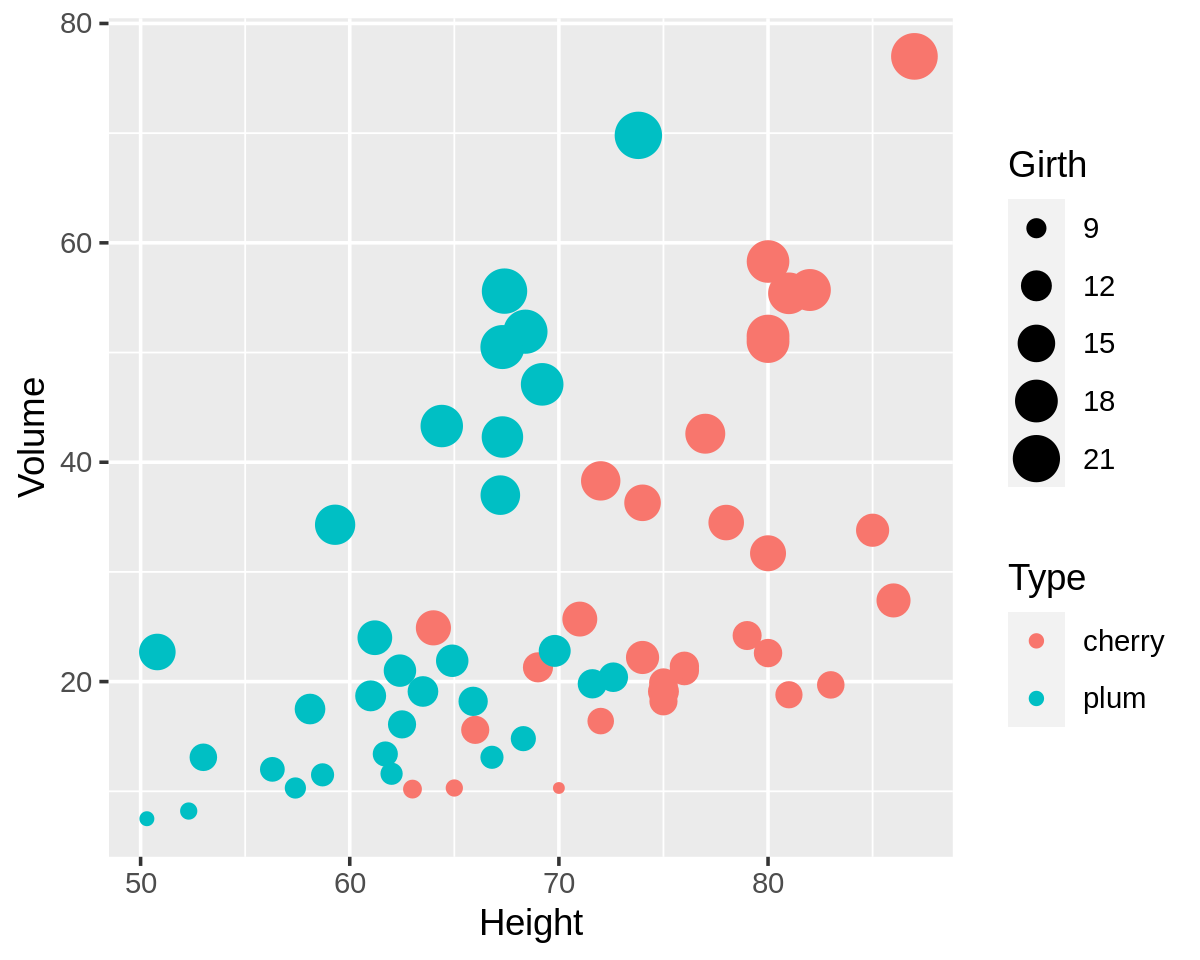

In [6]:
ggplot2::ggplot(dataframe,aes(x=Height, y=Volume,color=Type,size=Girth)) +
    ggplot2::geom_point()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="YOpWo0c7-{Kv5fgkUT,{" x="-51" y="106"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="!I?6+@e{%Fg5wS`13zw!"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="H4)le*X{cfhMs5b_M$8;"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d7W@SRx?r[z?ybM?W|TF"><field name="CODE">aes(x=Height, y=Volume,color=Type,size=Girth)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="wQ53ik[w+P7D9sZBt2CF"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data></block></value></block></xml>

Notice that in this scatterplot, each point **position** shows the relationship between `Height` and `Volume`, each point **size** shows `Girth`, and each **color** represents these values for a different `Type`.
It's not always possible to pack so much information into a single plot, but it can be extraordinarily useful when you can do it.
In this case, we can see that `Girth` also increases with `Height` and `Volume`, but this relationship does not appear to change with `Type`. 

### Modeling 1

Last time we looked at `trees`, we used `Height` to predict `Volume`.
With multiple linear regression, we can use more that one variable.
Let's use all our variables to predict `Volume`.

Start by loading the `recipes` and `workflows` packages, along with `parsnip`, `generics`, and `hardhat`:

- `library recipes`
- `library workflows`
- `library parsnip`
- `library generics`
- `library hardhat`

In [7]:
library(recipes)
library(workflows)
library(generics)
library(parsnip)
library(hardhat)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="import_R" id="EGE;dT.cnN,o}Y[99#Qb" x="-12" y="8"><field name="libraryName" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><next><block type="import_R" id="6DrE-26ByLD$vC}QeW:}"><field name="libraryName" id="haMDnc8Uj|EjY^608!;]">workflows</field><next><block type="import_R" id="hQ4(=]9%QB3(VWqs9OK:"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="d1vIIBH:{ygkVLV/Ts5l"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id="vFfUgs[O$$~/VO1yVa~v"><field name="libraryName" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field></block></next></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘recipes’ was built under R version 4.2.2”

Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘workflows’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Warning message:
“package ‘parsnip’ was built under R version 4.2.2”


Let's make a workflow that converts `Type` to dummies:

- Set `recipe` to 
    - `pipe` with `recipes` do `recipe`
        - using `Volume ~ .`
        - and `data = dataframe`
    - to with `recipes` do `step_dummy`
        - using with `recipes` do `all_nominal_predictors`
- Set `model` to 
    - `pipe` with `parsnip` do `linear_reg` 
    - to with `parsnip` do `set_mode` 
        - using `"regression"`
    - then to with `parsnip` do `set_engine`
        - using `"lm"`
- Set `workflow` to 
    - `pipe` with `workflows` do `workflow`
    - to with `workflows` do `add_model`
        - using `model`
    - then to with `workflows` do `add_recipe` 
        - using `recipe`

In [8]:
recipe = recipes::recipe(Volume ~ .,data = dataframe) %>%
    recipes::step_dummy(recipes::all_nominal_predictors())
model = parsnip::linear_reg() %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("lm")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="67" y="169"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">Volume ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_dummy</field><data>recipes:step_dummy</data><value name="ADD0"><block type="varDoMethod_R" id="4GS=rm//,9|E^?oX.CVv"><mutation items="0"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_nominal_predictors</field><data>recipes:all_nominal_predictors</data></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">linear_reg</field><data>parsnip:linear_reg</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">lm</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Train with the workflow, again using all the data:

-  Set `trained_model` to with `generics` do `fit`
    - using `workflow`
    - and `data = dataframe`
`trained_model`

In [9]:
trained_model = generics::fit(workflow,data = dataframe)

trained_model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable></variables><block type="variables_set" id="6F5Ls%m;fDN%1P.HL;~b" x="71" y="186"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="jAjgrG@)Vv]=~@dnuh7H"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="KB;+aD=xFzgUg0(`:xP:"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="siA`Xs!U2c1Ww}6ggh90"><field name="CODE">data = dataframe</field></block></value></block></value></block><block type="variables_get" id="qJ0nFc9Y6f9.~_a8X@r6" x="76" y="309"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></xml>

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)        Girth       Height    Type_plum  
   -52.6181       4.3220       0.3359       0.2092  


Go ahead and get the $r^2$:

- pipe 
    - `trained_model`
    - to with `hardhat` do `extract_fit_engine`
    - then to with `base` do `summary`

In [10]:
trained_model %>%
    hardhat::extract_fit_engine() %>%
    base::summary()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="pipe_R" id="_?zCt{QEC?tfj3H]HtAu" x="-112" y="162"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="biD^sO]L`.ULKGnJ7EfO"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="4ulNX*c7V_BV8hyrFBTr"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">summary</field><data>base:summary</data></block></value></block></xml>


Call:
stats::lm(formula = ..y ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3532 -1.9944 -0.8753  1.5445 11.3602 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -52.61806    5.58696  -9.418 2.73e-13 ***
Girth         4.32201    0.15359  28.139  < 2e-16 ***
Height        0.33591    0.08275   4.059 0.000149 ***
Type_plum     0.20925    1.38497   0.151 0.880434    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.513 on 58 degrees of freedom
Multiple R-squared:  0.9561,	Adjusted R-squared:  0.9538 
F-statistic: 421.2 on 3 and 58 DF,  p-value: < 2.2e-16


Note that `Type` is not significant.
We'll return to that later.

Based on that $r^2$, we'd think we have a really good model, right?

### Diagnostics 1

To check the model, the first thing we need to do is get the predictions and residuals from the model, which we can do with `augment`.
However, since this is a workflow, we need some additional steps to unpack it.

First, we need the `broom` package, which enhances `augment`:

- `library broom`

In [46]:
library(broom)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Ubl?FFCN5uCFfCTQ?7:z">broom</variable></variables><block type="import_R" id="nkWpWz(HL|K[RFZw#p(u" x="-246" y="10"><field name="libraryName" id="Ubl?FFCN5uCFfCTQ?7:z">broom</field></block></xml>

Now we can use `augment` with an additional step, using `hardhat` to unpack it:


- Set `data_evaluation` to with `generics` do `augment`
    - using `pipe`
        - `trained_model`
        - to with `hardhat` do `extract_fit_engine`
    - and `dataframe`
- `data_evaluation`

In [47]:
data_evaluation = generics::augment(trained_model %>%
    hardhat::extract_fit_engine(),dataframe)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="variables_set" id="7OSm@|dWOrh4sI}i|5zU" x="-188" y="87"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="/V-=f8y|WOLHmMCx.011"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="pipe_R" id="_?zCt{QEC?tfj3H]HtAu"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="(-yLq*8u.=fnYZQx|}dp"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="biD^sO]L`.ULKGnJ7EfO"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value></block></value><value name="ADD1"><block type="variables_get" id="k4SaVdD8uR0WT{@2b.xL"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value></block><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+" x="-177" y="283"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></xml>

Girth,Height,Volume,Type,.fitted,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.3,70,10.3,cherry,6.768500,0.06828027,3.510293,0.0198724133,1.0414786
8.6,65,10.3,cherry,6.385543,0.08772311,3.501759,0.0327198489,1.1666537
8.8,63,10.2,cherry,6.578122,0.10393962,3.507157,0.0344018610,1.0891784
10.5,72,16.4,cherry,16.948754,0.04418518,3.542804,0.0002950473,-0.1597807
10.7,81,18.8,cherry,20.836366,0.07174630,3.532508,0.0069949627,-0.6016671
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
17.9,69.2,47.1,plum,48.20034,0.06645916,3.540372,0.0018704817,-0.32418728
18.8,67.3,50.5,plum,51.45192,0.07904267,3.541148,0.0017107811,-0.28236845
19.7,67.4,55.6,plum,55.37533,0.09600361,3.543446,0.0001201336,0.06726696


Now let's do some diagnostic plots!

- `library ggfortify`

In [48]:
library(ggfortify)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="tf(leE=z8{GT1?Sd7e|U">ggfortify</variable></variables><block type="import_R" id="{a@kEnYPhSWh19~lkOXv" x="-187" y="-24"><field name="libraryName" id="tf(leE=z8{GT1?Sd7e|U">ggfortify</field></block></xml>

Warning message:
“package ‘ggfortify’ was built under R version 4.2.2”
Registered S3 method overwritten by 'ggfortify':
  method          from   
  autoplot.glmnet parsnip



Make the plots:

- with `ggplot2` do `autoplot`
    - using `pipe`
        - `trained_model`
        - to with `hardhat` do `extract_fit_engine`

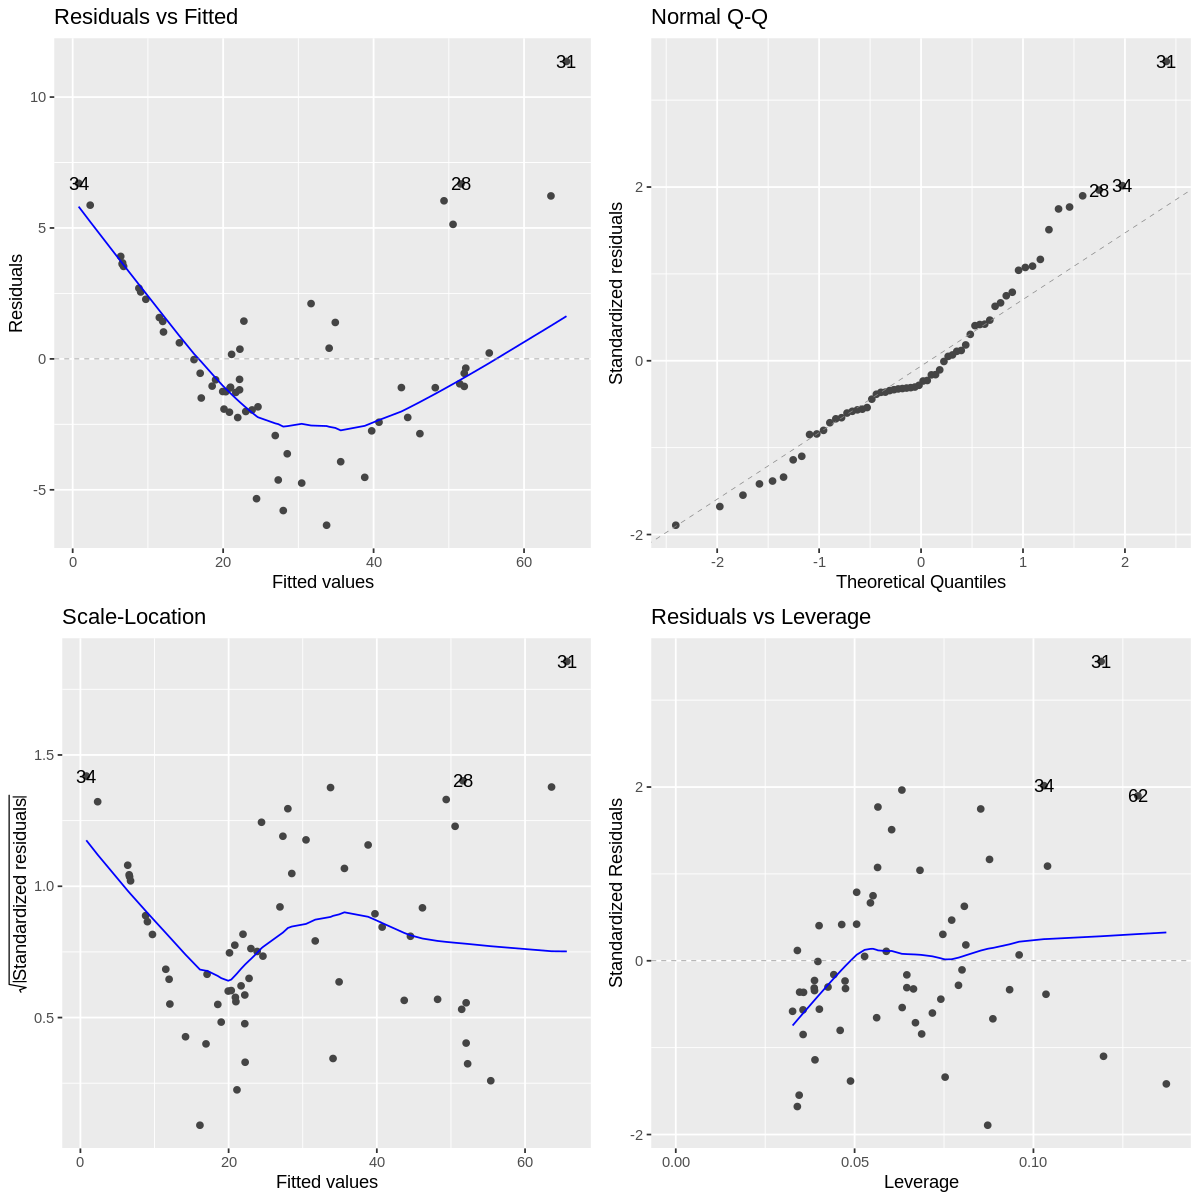

In [58]:
ggplot2::autoplot(trained_model %>%
    hardhat::extract_fit_engine())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="varDoMethod_R" id="eH5:NQO]BK?da)P[H/+C" x="-195" y="142"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">autoplot</field><data>ggplot2:autoplot</data><value name="ADD0"><block type="pipe_R" id=")gqcCK8SG#?qxc!4ozue"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="4[h3/dELtUSw9fAx4Bc*"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="qxx|d][;K]DL=rZlWgUq"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value></block></value></block></xml>

In the fitted vs. residual plot (top left) we something very wrong: a "U" shape from left to right.
This means our residuals are positive for low predictions, go negative for mid predictions, and go positive again for high predictions.
The only way this can happen is if something is quadratic (squared) in the phenomenon we're trying to model.

### Modeling 2

Step back for a moment and consider what we are trying to do.
We are trying to predict volume from other measurements of the tree.
What is the formula for volume?

$$V = \pi r^2 h$$

Since this is the mathematical definition, we don't expect any differences for `plum` vs. `cherry`.
And indeed, we already saw that Type was not a significant predictor.

What are our variables?

- `Volume`
- `Girth` (diameter, which is twice $r$)
- `Height`

In other words, we basically have everything in the formula.
Let's create a new model with a formula that is closer to what we want, `Girth` * `Girth` * `Height`

As you might have noticed, `GGH` is an interaction. 
Often when we use interactions in a model, we also include the variables that the interactions are made of (also known as **main effects**).
However, in this case, that doesn't make sense because we know the interaction is close to the definition of `Volume`.

So let's fit a new model using *just* `GGH`, save its predictions and residuals, and plot its predicted vs. residual diagnostic plot.

The code below  recaps some of our steps for the first model.
The main difference is updating the recipe in the workflow, leaving everything else in the workflow alone.
In workflows, interactions are defined using `step_interact` rather than in the main model formula.
The syntax `Girth:Girth:Height` means multiply these variables to create a new predictor.
Everything besides updating the workflow you can copy in from previous cells:

- Set `workflow` to 
    - `pipe` with `workflows` do `workflow`
    - to with `workflows` do `update_recipe`
        - using `pipe` 
            - with `recipes` do `recipe`
                - using `Volume ~ .`
                - and `data = dataframe`
        - to with `recipes` do `step_dummy`
            - using with `recipes` do `all_nominal_predictors`
        - to with `recipes` do `step_interact`
            - using `~ Girth:Girth:Height`
-  Set `trained_model` to with `generics` do `fit`
    - using `workflow`
    - and `data = dataframe`
- Set `data_evaluation` to with `generics` do `augment`
    - using `pipe`
        - `trained_model`
        - to with `hardhat` do `extract_fit_engine`
    - and `dataframe`
- `data_evaluation`



In [76]:
workflow = workflow %>%
    workflows::update_recipe(recipes::recipe(Volume ~ .,data = dataframe) %>%
    recipes::step_dummy(recipes::all_nominal_predictors()) %>%
    recipes::step_interact(~ Girth:Girth:Height))
trained_model = generics::fit(workflow,data = dataframe)
data_evaluation = generics::augment(trained_model %>%
    hardhat::extract_fit_engine(),dataframe)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="variables_set" id="iAXV:^yL4/lXHXq9-fWq" x="-266" y="164"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Oc60%_2o@.oLe%Y#3?BI"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="DLhYW=bspAQ$a:^k%4!`"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="uerg~4,OSsOP%Q_GMx!W"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">update_recipe</field><data>workflows:update_recipe</data><value name="ADD0"><block type="pipe_R" id="B.*cc=E%xNwq$Un,Ax.="><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="wZSxK-Q`YDupD0Z0RCJo"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id=".`h)ou@92pRPBxignHeV"><field name="CODE">Volume ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="rp,;{Y+|Eb#~Fe(Ttax."><field name="CODE">data = dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="i)}I$#|,2*1I7:i=B!Nn"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_dummy</field><data>recipes:step_dummy</data><value name="ADD0"><block type="varDoMethod_R" id=".MhjxJkR~4.z|JSj3NvB"><mutation items="0"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_nominal_predictors</field><data>recipes:all_nominal_predictors</data></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="8$[|48vu[DGl2$Fb|S!P"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_interact</field><data>recipes:step_interact</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="LCeBuURaO3kA$ndHfvDD"><field name="CODE">~ Girth:Girth:Height</field></block></value></block></value></block></value></block></value></block></value><next><block type="variables_set" id="JYRrWzO%n`MVx/]/0-U="><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="G;Ti7zT)NN:K~,?6G@Sc"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="UQ+4F`M!L]%Rl`2JZ/|*"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="qT3l1#t])/i6SVL5ySZ;"><field name="CODE">data = dataframe</field></block></value></block></value><next><block type="variables_set" id="k8r|aUDcbLq1vC?=V^iX"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="WA/F//on%eutX+nvUVl8"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="pipe_R" id=",]FT3H:+%VcE9#Wd#haC"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id=")zN@?FwwC~-?:pGhm:U2"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="Z$lk4imCmH.F,W;cq/({"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value></block></value><value name="ADD1"><block type="variables_get" id="jABx2P(}|Eo25i(kKefw"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="O%EwXHU~c#yIb@5Ag/|," x="-262" y="598"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></xml>

Girth,Height,Volume,Type,.fitted,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.3,70,10.3,cherry,5.793311,0.07054497,2.211890,0.063912838,2.0519190
8.6,65,10.3,cherry,7.006447,0.08864120,2.251693,0.044611796,1.5143865
8.8,63,10.2,cherry,7.706600,0.10697227,2.271200,0.032135775,1.1581806
10.5,72,16.4,cherry,15.467790,0.04940821,2.294851,0.001831057,0.4196946
10.7,81,18.8,cherry,18.124831,0.08925544,2.296460,0.001890299,0.3105497
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
17.9,69.2,47.1,plum,46.92459,0.07033503,2.298277,0.0000964923,0.07985622
18.8,67.3,50.5,plum,48.93567,0.09412063,2.287887,0.0108159152,0.72145529
19.7,67.4,55.6,plum,52.63092,0.11393987,2.259426,0.0493011760,1.38454595


### Diagnostics 2

And now plot the predicted vs residuals to check linearity and equal variance:

- with `ggplot2` do `autoplot`
    - using `pipe`
        - `trained_model`
        - to with `hardhat` do `extract_fit_engine`

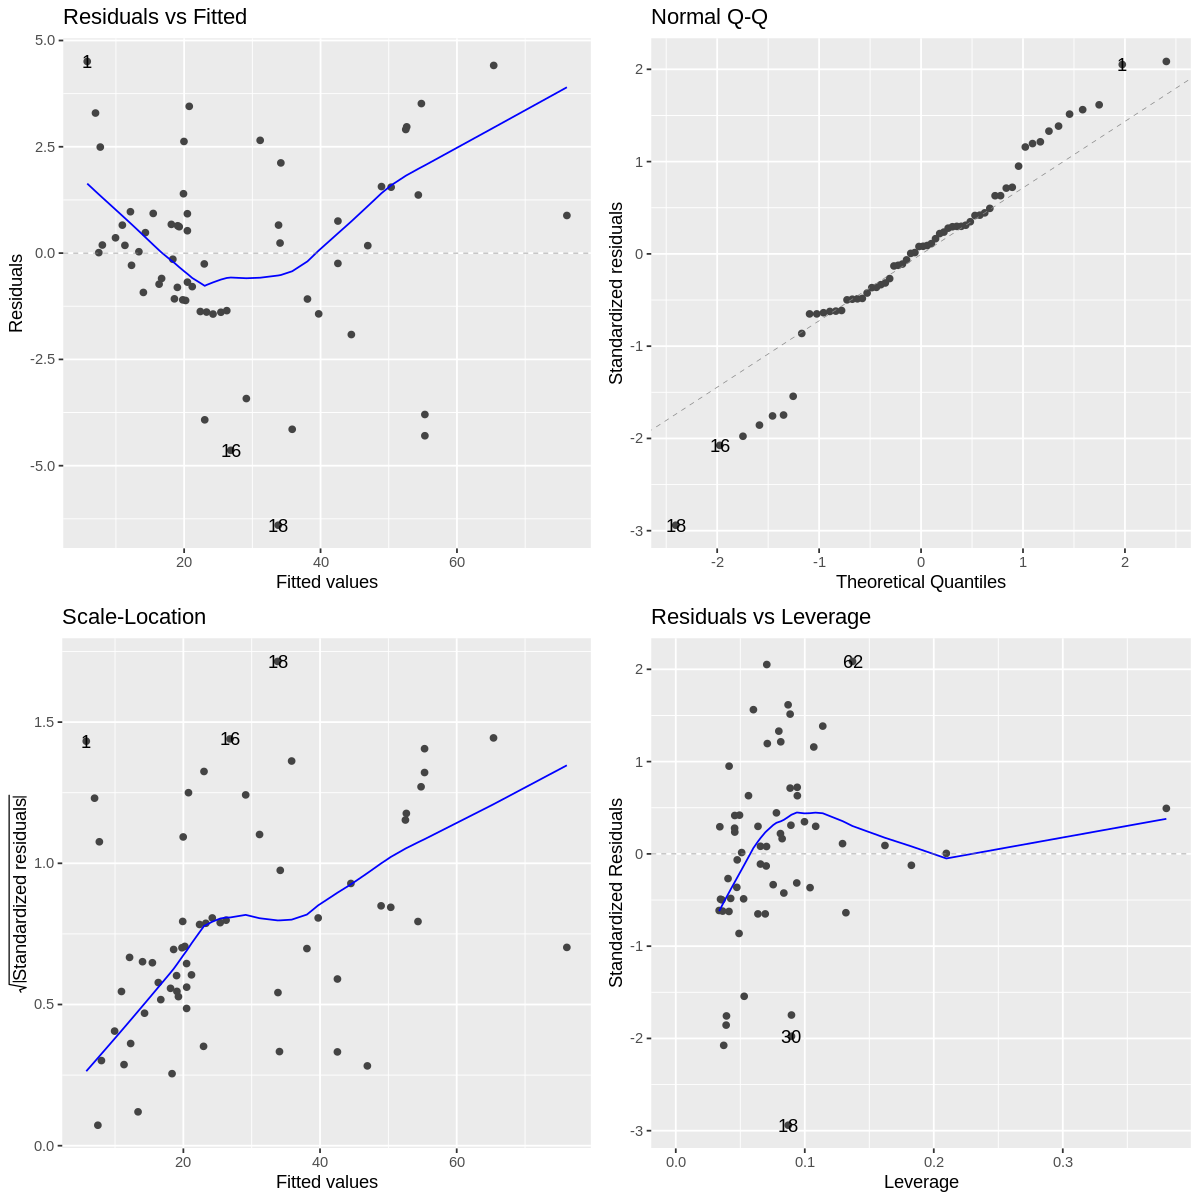

In [77]:
ggplot2::autoplot(trained_model %>%
    hardhat::extract_fit_engine())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="varDoMethod_R" id="eH5:NQO]BK?da)P[H/+C" x="-195" y="142"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">autoplot</field><data>ggplot2:autoplot</data><value name="ADD0"><block type="pipe_R" id=")gqcCK8SG#?qxc!4ozue"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="4[h3/dELtUSw9fAx4Bc*"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="qxx|d][;K]DL=rZlWgUq"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value></block></value></block></xml>

The "U" pattern is still there, but if you look at the y-values on this plot vs. the first model, you'll notice that they are much smaller here (this plot is zoomed in).
So we seem to have improved things without fully resolving the linearity issue.

With this new model, calculate $r^2$ by copying the blocks above and making appropriate adjustments:

- pipe 
    - `trained_model`
    - to with `hardhat` do `extract_fit_engine`
    - then to with `base` do `summary`


In [78]:
trained_model %>%
    hardhat::extract_fit_engine() %>%
    base::summary()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="pipe_R" id="_?zCt{QEC?tfj3H]HtAu" x="-112" y="162"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="biD^sO]L`.ULKGnJ7EfO"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="4ulNX*c7V_BV8hyrFBTr"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">summary</field><data>base:summary</data></block></value></block></xml>


Call:
stats::lm(formula = ..y ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4000 -1.0949  0.1785  0.9624  4.5067 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    23.102100   9.164675   2.521  0.01453 *  
Girth          -1.957984   0.705237  -2.776  0.00743 ** 
Height         -0.749336   0.132046  -5.675 4.87e-07 ***
Type_plum       1.149274   0.904230   1.271  0.20889    
Girth_x_Height  0.088461   0.009835   8.995 1.57e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.278 on 57 degrees of freedom
Multiple R-squared:  0.9819,	Adjusted R-squared:  0.9806 
F-statistic: 771.4 on 4 and 57 DF,  p-value: < 2.2e-16


The $r^2$ increased from .95 on model 1 to .98 on model 2, further supporting the inclusion of the interaction in the model.